# Data Visualization

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

In [146]:
# Load the data from "StoreTraffic.csv" into a DataFrame
df = pd.read_csv("StoreTraffic.csv")
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [117]:
df.columns

Index(['date', 'store_id', 'store_innum', 'mall_id', 'city_id', 'mall_innum',
       'month', 'day_of_week', 'is_weekend', 'is_holiday', 'is_workday',
       'is_work_tmw', 'holiday_level', 'holiday_length', 'th_holiday',
       'holiday_type', 'holiday_name', 'days_to_last_holiday',
       'days_to_next_holiday', 'days_to_last_release_date',
       'days_to_next_release_date', 'days_to_last_sale_date',
       'days_to_next_sale_date'],
      dtype='object')

In [98]:
df['city_id'].nunique()

15

# Q1

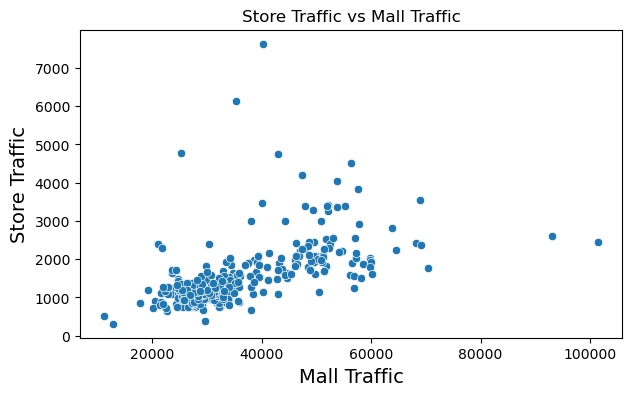

In [74]:
# Filter the data for Store 1
store1_data = df[df['store_id'] == 1]

sns.scatterplot(data=store1_data, x="mall_innum", y="store_innum")


plt.figure(figsize=(7, 4))
plt.xlabel('Mall Traffic',fontsize = 14)
plt.ylabel('Store Traffic',fontsize = 14)

plt.title("Store Traffic vs Mall Traffic")
plt.show()



Text(0.5, 1.0, 'Traffic on non-holidays and holidays')

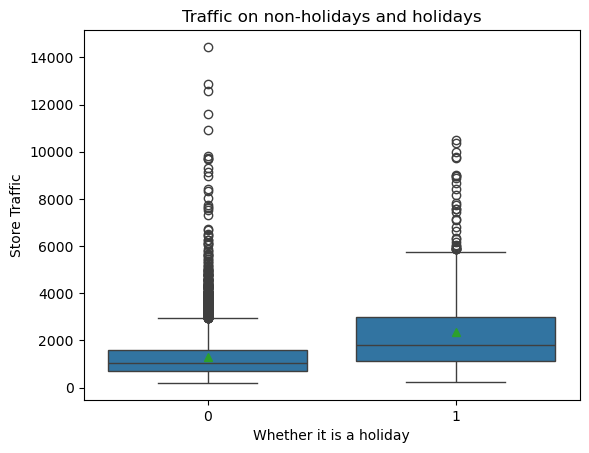

In [76]:

sns.boxplot(data=df, y='store_innum', x='is_holiday',showmeans=True)

# Set labels and title
plt.xlabel('Whether it is a holiday')
plt.ylabel('Store Traffic')
plt.title('Traffic on non-holidays and holidays')

# Q2: Line plot of daily traffic of stores

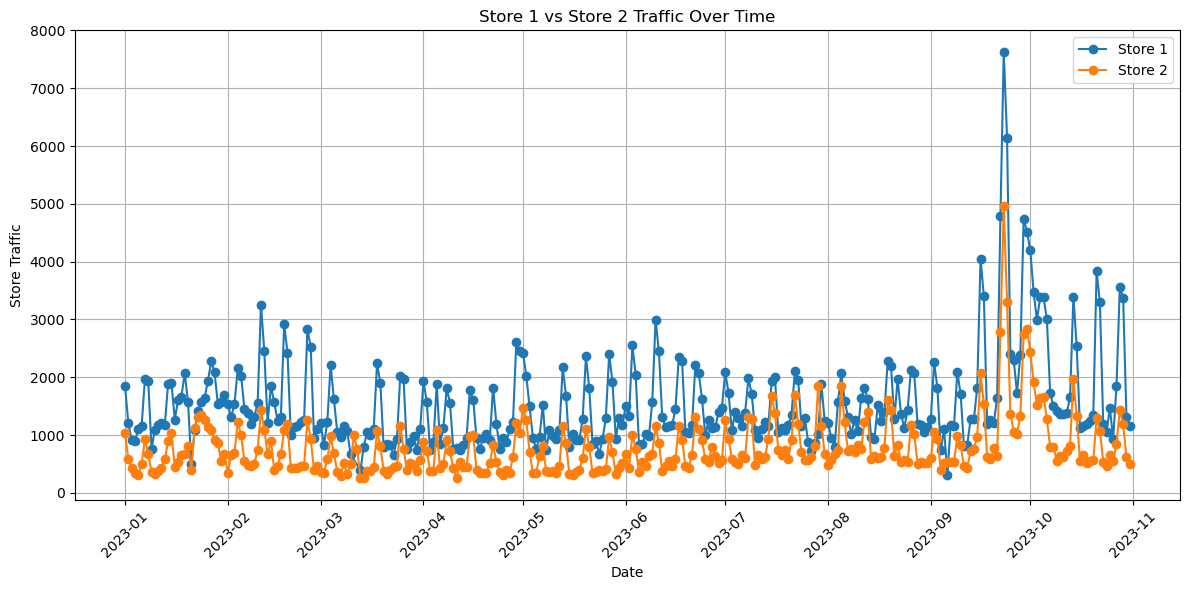

In [79]:


# Filter the data for Store 1 and Store 2
store1_data = df[df['store_id'] == 1]
store2_data = df[df['store_id'] == 2]


# Create a line plot to visualize the traffic of Store 1 and Store 2 across time
# the x-axis is 'date' and y-axis is 'store_innum'
plt.figure(figsize=(12, 6))
plt.plot(store1_data['date'], store1_data['store_innum'], label='Store 1', marker='o')
plt.plot(store2_data['date'], store2_data['store_innum'], label='Store 2', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Store Traffic')
plt.title('Store 1 vs Store 2 Traffic Over Time')

# Add a legend to differentiate between Store 1 and Store 2
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Q3: Line plot of average store traffic over time

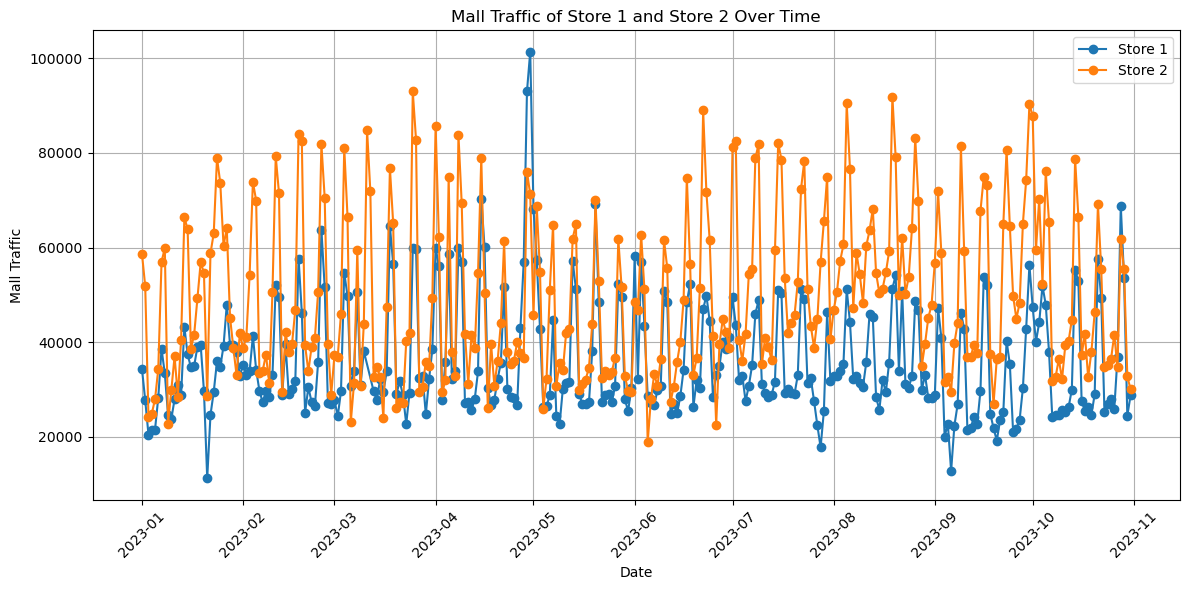

In [82]:


# Filter the data for Store 1 and Store 2
store1_data = df[df['store_id'] == 1]
store2_data = df[df['store_id'] == 2]


# Create a line plot to visualize the traffic of Store 1 and Store 2 across time
# the x-axis is 'date' and y-axis is 'store_innum'
plt.figure(figsize=(12, 6))
plt.plot(store1_data['date'], store1_data['mall_innum'], label='Store 1', marker='o')
plt.plot(store2_data['date'], store2_data['mall_innum'], label='Store 2', marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Mall Traffic')
plt.title('Mall Traffic of Store 1 and Store 2 Over Time')

# Add a legend to differentiate between Store 1 and Store 2
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Average Store Traffic')

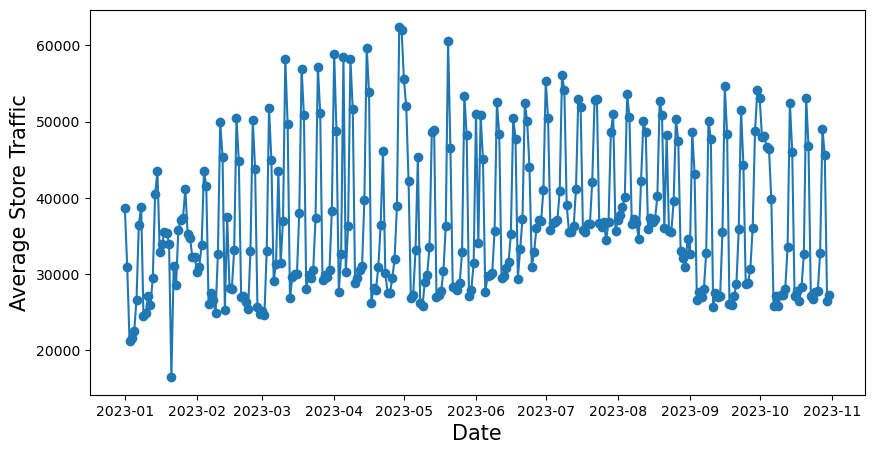

In [84]:
# Group by 'date' and compute the average of 'store_innum'
daily_avg_traffic = df.groupby('date')['store_innum'].mean().reset_index()

# Rename the column for clarity
daily_avg_traffic.rename(columns={'store_innum': 'avg_daily_traffic'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(daily_avg_traffic['date'], daily_avg_traffic['avg_daily_traffic'], marker='o')
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Average Store Traffic',fontsize = 15)

# Q4

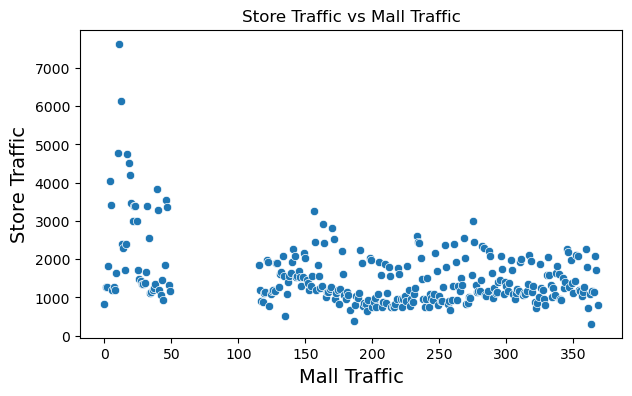

In [19]:


# Load the data from "StoreTraffic.csv" into a DataFrame
# data = pd.read_csv("StoreTraffic.csv")

# Filter the data for Store 1
store1_data = df[df['store_id'] == 1]


plt.figure(figsize=(7, 4))
plt.xlabel('Mall Traffic',fontsize = 14)
plt.ylabel('Store Traffic',fontsize = 14)
sns.scatterplot(data=store1_data, x="days_to_last_release_date", y="store_innum")
plt.title("Store Traffic vs Mall Traffic")
plt.show()



# PART 2 - Feature Engineering

<Figure size 1200x600 with 0 Axes>

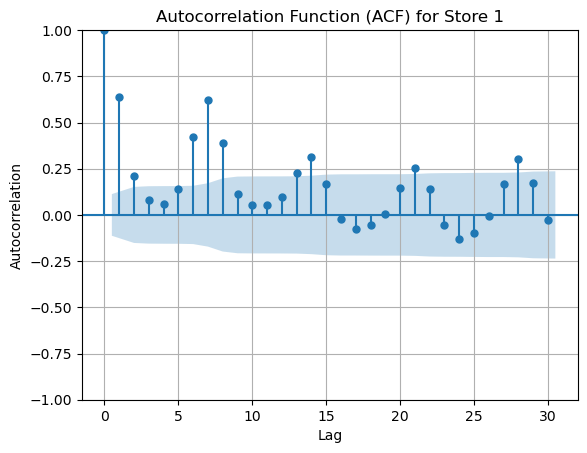

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Load the data from "StoreTraffic.csv" into a DataFrame
df = pd.read_csv("StoreTraffic.csv")


# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
# Filter the data for Store 1
store1_df = df[df['store_id'] == 1]

# Create a lag plot with 30 lags to check autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(store1_df['store_innum'], lags=30)
plt.title('Autocorrelation Function (ACF) for Store 1')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [123]:
df = df.sort_values(by=['store_id', 'date'])

# Add lagged values (e.g., lag=1 and lag=2)
df['store_innum_lag2'] = df.groupby('store_id')['store_innum'].shift(7)
df['store_innum_lag2'] = df.groupby('store_id')['store_innum'].shift(14)

In [125]:
# Rolling Statistics

In [127]:

# Make sure your data is sorted
df = df.sort_values(by=['store_id', 'date'])

# Rolling mean from day -14 to -8 (i.e. shift 7, then rolling 7)
df['store_innum_rolling_mean_8to14'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=7).mean())
)

# Rolling std from day -14 to -8
df['store_innum_rolling_std_8to14'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=7).std())
)

df['store_innum_rolling_mean_8to21'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=14).mean())
)


df['store_innum_rolling_std_8to21'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=14).std())
)

df['store_innum_rolling_mean_8to35'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=28).mean())
)

df['store_innum_rolling_std_8to35'] = (
    df.groupby('store_id')['store_innum']
    .transform(lambda x: x.shift(7).rolling(window=28).std())
)
df['mall_innum_rolling_mean_8to14'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=7).mean())
)

# Rolling std from day -14 to -8
df['mall_innum_rolling_std_8to14'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=7).std())
)

df['mall_innum_rolling_mean_8to21'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=14).mean())
)


df['mall_innum_rolling_std_8to21'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=14).std())
)

df['mall_innum_rolling_mean_8to35'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=28).mean())
)

df['mall_innum_rolling_std_8to35'] = (
    df.groupby('store_id')['mall_innum']
    .transform(lambda x: x.shift(7).rolling(window=28).std())
)
df

,date,store_id,store_innum,mall_id,city_id,mall_innum,month,day_of_week,is_weekend,is_holiday,...,store_innum_rolling_mean_8to21,store_innum_rolling_std_8to21,store_innum_rolling_mean_8to35,store_innum_rolling_std_8to35,mall_innum_rolling_mean_8to14,mall_innum_rolling_std_8to14,mall_innum_rolling_mean_8to21,mall_innum_rolling_std_8to21,mall_innum_rolling_mean_8to35,mall_innum_rolling_std_8to35
0,2023-01-01,1.0,1854.0,300.0,350100.0,34430.0,1,7,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2023-01-02,1.0,1201.0,300.0,350100.0,27732.0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,2023-01-03,1.0,920.0,300.0,350100.0,20493.0,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2023-01-04,1.0,891.0,300.0,350100.0,21501.0,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2023-01-05,1.0,1108.0,300.0,350100.0,21540.0,1,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-10-27,20.0,1072.0,32.0,321200.0,35451.0,10,5,0,0,...,1287.857143,580.957149,2480.250000,1650.133118,39441.000000,15793.002754,34234.071429,12186.816095,44486.535714,16459.616560
6015,2023-10-28,20.0,1900.0,32.0,321200.0,58970.0,10,6,1,0,...,1411.428571,701.409648,2373.000000,1518.879850,41090.714286,18891.812280,37559.785714,15950.708150,44957.821429,17118.730632
6035,2023-10-29,20.0,1940.0,32.0,321200.0,70638.0,10,7,1,0,...,1477.857143,742.950755,2291.321429,1453.896172,41342.142857,19204.020407,39649.785714,17191.498159,45236.392857,17342.938008
6055,2023-10-30,20.0,801.0,32.0,321200.0,32526.0,10,1,0,0,...,1451.500000,762.118581,2244.785714,1481.664313,41481.714286,19106.266491,39984.428571,16943.210048,44967.107143,17518.062823


# Part 3 Modling

## Data Preparation

In [148]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Load the data from "StoreTraffic.csv" into a DataFrame
# data = pd.read_csv("StoreTraffic.csv")

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['holiday_type'] = df['holiday_type'].astype('category')
df['holiday_name'] = df['holiday_name'].astype('category')
df['store_id'] = df['store_id'].astype('category')
df['city_id'] = df['city_id'].astype('category')
df.drop(['days_to_next_release_date','days_to_next_sale_date','mall_id'],axis = 1, inplace = True)


# Split the data into training and validation sets based on the date
train = df[df['date'] < '2023-08-01']
test = df[df['date'] >= '2023-08-01']


# Build and train the gradient boosting trees model
train_y = train['store_innum']
train_X = train.drop(['store_innum','date'],axis = 1)

test_y = test['store_innum']
test_X = test.drop(['store_innum','date'],axis = 1)


In [160]:


# cross validation
param_grid = {
    'num_leaves': randint(5, 50),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(loc=0.01, scale=0.29),
    'n_estimators': randint(50, 500)
}


model = lgb.LGBMRegressor(objective='mae', random_state=42)

cv_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,
    cv=4,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # since you're using MAE
    verbose=1,
    n_jobs=-1  # parallelize
)


cv_search.fit(train_X, train_y)

# Predict on the test set

test_ypred= cv_search.best_estimator_.predict(test_X)

MAE_test = mean_absolute_error(test_y,test_ypred)


print("MAE for Test Set:", MAE_test)



Fitting 4 folds for each of 5 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 4237, number of used features: 18
[LightGBM] [Info] Start training from score 1032.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

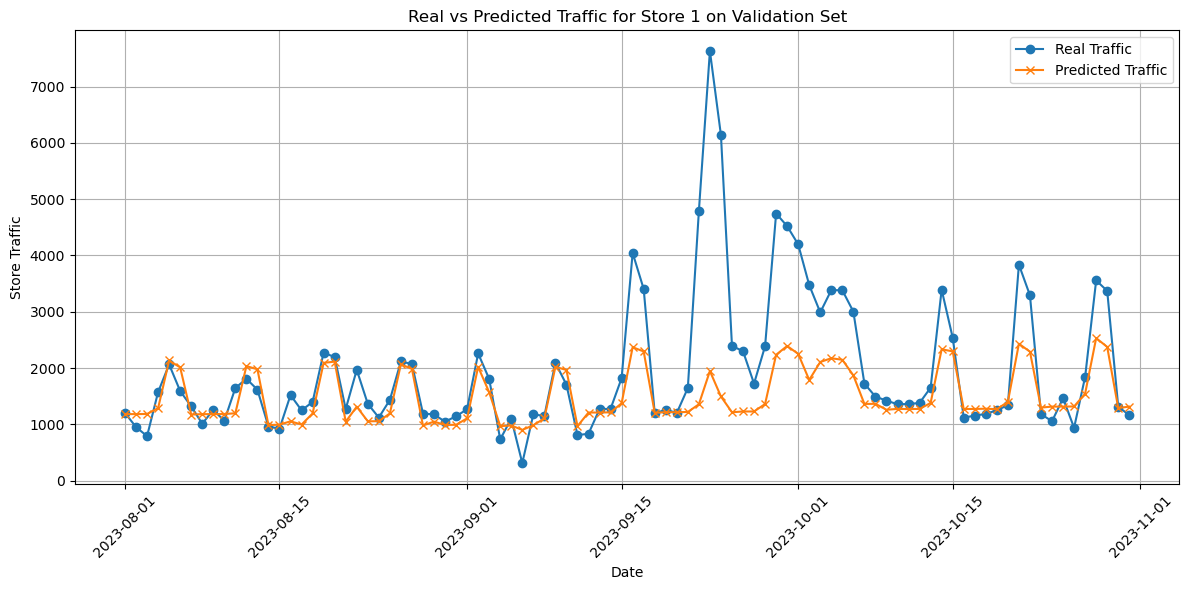

In [162]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

# data = pd.read_csv("StoreTraffic.csv")



store_id = 1

# Plot the real and predicted traffic for the first store on the validation set
plt.figure(figsize=(12, 6))
plt.plot(test[test['store_id'] == store_id]['date'],
         test[test['store_id'] == store_id]['store_innum'],
         label='Real Traffic', marker='o')
plt.plot(test[test['store_id'] == store_id]['date'],
         test_ypred[test['store_id'] == store_id], label='Predicted Traffic', marker='x')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Store Traffic')
plt.title(f'Real vs Predicted Traffic for Store {store_id} on Validation Set')
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Compute the total Cost

In [165]:
from sklearn.metrics import make_scorer
import numpy as np

def inventory_cost_score(y_true, y_pred, conversion_rate=0.001, overstock_cost=10, understock_cost=500):
    """
    Custom cost-based scoring function.
    
    Args:
        y_true: array-like, true traffic values.
        y_pred: array-like, predicted traffic values.
        avg_abs_error: float, average absolute prediction error across training data.
        
    Returns:
        Negative total cost (since sklearn maximizes score).
    """
    # Planned inventory based on adjusted prediction
    avg_abs_error = mean_absolute_error(y_true,y_pred)
    planned_inventory = conversion_rate * (y_pred + avg_abs_error)
    actual_demand = conversion_rate * y_true

    # Compute overstock and understock cost
    overstock = np.maximum(planned_inventory - actual_demand, 0)
    understock = np.maximum(actual_demand - planned_inventory, 0)

    cost = overstock_cost * overstock + understock_cost * understock
    total_cost = np.sum(cost)

    # Return negative because GridSearchCV tries to maximize the score
    return total_cost

# Wrapper for GridSearchCV
def make_inventory_scorer():
    return make_scorer(
        lambda y_true, y_pred: inventory_cost_score(y_true, y_pred),
        greater_is_better=False
    )


cost_test = inventory_cost_score(test_y,test_ypred)


print("MAE for Test Set:", cost_test)

MAE for Test Set: 301589.11895409937


In [167]:


# cross validation
param_grid = {
    'num_leaves': randint(5, 50),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(loc=0.01, scale=0.29),
    'n_estimators': randint(50, 500)
}


model = lgb.LGBMRegressor(objective='mae', random_state=42)

cv_search_inventory = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,
    cv=4,  # 5-fold cross-validation
    scoring=make_inventory_scorer(),  # since you're using MAE
    verbose=1,
    n_jobs=-1  # parallelize
)


cv_search_inventory.fit(train_X, train_y)



# Predict on the test set

test_ypred= cv_search_inventory.best_estimator_.predict(test_X)

MAE_test = mean_absolute_error(test_y,test_ypred)


print("MAE for Test Set:", MAE_test)

cost_test = inventory_cost_score(test_y,test_ypred)


print("cost for Test Set:", cost_test)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 944
[LightGBM] [Info] Number of data points in the train set: 4237, number of used features: 18
[LightGBM] [Info] Start training from score 1032.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MAE for Test Set: 584.8769241454975
cost for Test Set: 294745.6267927368
